In [112]:
import xarray as xr
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from matplotlib.animation import Animation, ArtistAnimation
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.dates import DayLocator,DateFormatter,date2num

import datetime
from PIL import Image


<IPython.core.display.Javascript object>


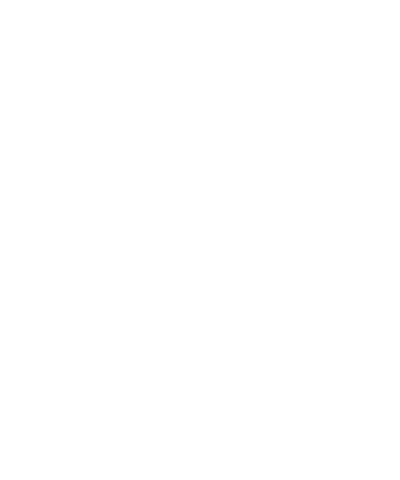

<IPython.core.display.Javascript object>


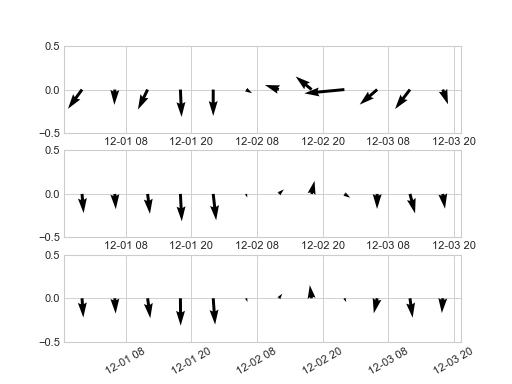

(array([737394.33333333, 737394.83333333, 737395.33333333, 737395.83333333,
        737396.33333333, 737396.83333333]),
 <a list of 6 Text xticklabel objects>)

In [67]:
ds = xr.open_dataset('hycom124_correto.nc')

#%matplotlib notebook

fig=plt.figure(1, figsize=(5,6))
fig, axes = plt.subplots(nrows=3, ncols=1)
        
axes[0].quiver(ds.time.values,np.tile(0,len(ds.time)),
          ds.U[:,0,0,0],ds.V[:,0,0,0],units='xy',angles='uv',scale=2, color='k')
axes[1].quiver(ds.time.values,np.tile(0,len(ds.time)),
          ds.U[:,15,0,0],ds.V[:,0,0,0],units='xy',angles='uv',scale=2, color='k')
axes[2].quiver(ds.time.values,np.tile(0,len(ds.time)),
          ds.U[:,20,0,0],ds.V[:,0,0,0],units='xy',angles='uv',scale=2, color='k')

axes[0].set_ylim(-0.5,+0.5)
axes[1].set_ylim(-0.5,+0.5)
axes[2].set_ylim(-0.5,+0.5)

ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
plt.xticks(rotation =30)  

In [117]:
x, y,z = np.meshgrid(ds.LONGITUDE.values,
                      ds.LATITUDE.values,
                    ds.DEPTH.values*-1)

im = []

#ajuste dos dados do campo de vetores do modelo
colormod = ((ds.U.values)**2+(ds.V.values)**2)**0.5
colormod = colormod.flatten()
colormod = np.ma.masked_less_equal(colormod,0)

#paleta
cmap= plt.cm.jet
cmap.set_bad(color='white')

#norm = Normalize(np.nanmin(colormod),np.nanmax(colormod))
norm = Normalize(np.nanmin(colormod),1)

for t in ds.time:
    
    teste = ds.sel(time=t)
    
    u = z*1
    v = z*1
    w = x*0
    
    for d in range(0,len(ds.DEPTH)):
        dep = teste.isel(DEPTH=d)
        u[:,:,d] = dep.U.values
        v[:,:,d] = dep.V.values

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    def q_plot:()
        ax.quiver(x[:,:,0:-1:4],y[:,:,0:-1:4],z[:,:,0:-1:4],
                  u[:,:,0:-1:4],v[:,:,0:-1:4],w[:,:,0:-1:4],
                  color=cmap(norm(colormod)))

        #colorbar            
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm)

        plt.show()     
    
anim = ArtistAnimation(fig, im)
anim.save('line.gif', dpi=200, writer='imagemagick')
    
   

C:\Users\igor.atake\AppData\Local\conda\conda\envs\py362\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


<IPython.core.display.Javascript object>

C:\Users\igor.atake\AppData\Local\conda\conda\envs\py362\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\igor.atake\AppData\Local\conda\conda\envs\py362\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:2695: RuntimeWarning: invalid value encountered in greater
  mask = norm > 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable.


IndexError: list index out of range

In [116]:
len(im)


12